In [24]:
#install necessary libraries
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn

#import packages and scikit-learn

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip3 install --upgrade pip


In [25]:
from pathlib import Path

# 1) Point to the folder that holds the CSVs
DATA_DIR = Path("data_directory")   # 

# 2) Quick sanity check (should list 5 CSVs)
print("CWD:", Path.cwd())
print("In data_directory:", list(DATA_DIR.glob("*.csv")))

# 3) Read the files
accounts    = pd.read_csv(DATA_DIR / "accounts.csv")
products    = pd.read_csv(DATA_DIR / "products.csv")
pipeline    = pd.read_csv(DATA_DIR / "sales_pipeline.csv")
sales_teams = pd.read_csv(DATA_DIR / "sales_teams.csv")
data_dict   = pd.read_csv(DATA_DIR / "data_dictionary.csv")

for df, name in [
    (accounts, "Accounts"),
    (products, "Products"),
    (pipeline, "Pipeline"),
    (sales_teams, "Sales Teams"),
    (data_dict, "Data Dictionary")
]:
    print(f"\n{name} ---")
    print(df.info())
    print(df.head())

CWD: /Users/kaylacheng/Desktop/crm intelligence agent/Team2B
In data_directory: [PosixPath('data_directory/products.csv'), PosixPath('data_directory/cleaned_pipeline.csv'), PosixPath('data_directory/accounts.csv'), PosixPath('data_directory/sales_pipeline.csv'), PosixPath('data_directory/sales_teams.csv'), PosixPath('data_directory/data_dictionary.csv')]

Accounts ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB
None
            account     sector  year_

In [46]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the cleaned pipeline data
df = pd.read_csv("data_directory/cleaned_pipeline.csv")

# Check columns
print(df.columns.tolist())

# Select features and target (update as needed)
features = ['sales_agent', 'revenue', 'employees', 'close_value', 'sales_cycle_days']
X = df[features]
y = df['deal_stage']

# Encode categorical features (only those present)
for col in ['sales_agent', 'revenue', 'employees', 'close_value', 'sales_cycle_days']:
    X[col] = X[col].astype(str)
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Encode target
y = y.astype(str)
y_le = LabelEncoder()
y = y_le.fit_transform(y)

['sales_agent', 'manager', 'regional_office', 'account', 'sector', 'year_established', 'revenue', 'employees', 'office_location', 'subsidiary_of', 'product', 'series', 'sales_price', 'deal_stage', 'engage_date', 'close_date', 'close_value', 'sales_cycle_days']


/var/folders/5s/2knkxvvj759573jwc48wk1wc0000gn/T/ipykernel_95367/3273960434.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/5s/2knkxvvj759573jwc48wk1wc0000gn/T/ipykernel_95367/3273960434.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/var/folders/5s/2knkxvvj759573jwc48wk1wc0000gn/T/ipykernel_95367/3273960434.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

RF 20 Accuracy: 0.999548532731377
RF 20 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00      1377

    accuracy                           1.00      2215
   macro avg       1.00      1.00      1.00      2215
weighted avg       1.00      1.00      1.00      2215

RF 100 Accuracy: 0.999548532731377
RF 100 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00      1377

    accuracy                           1.00      2215
   macro avg       1.00      1.00      1.00      2215
weighted avg       1.00      1.00      1.00      2215



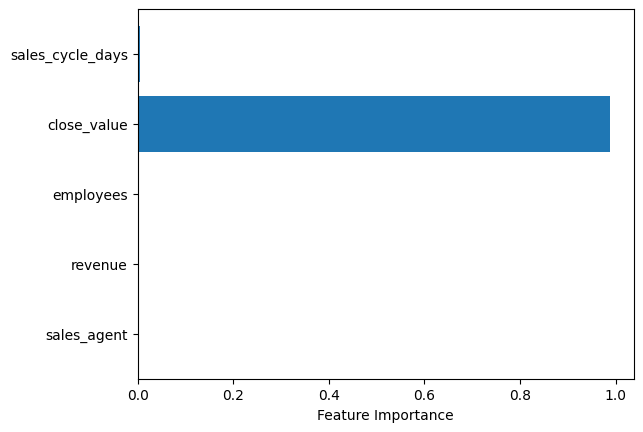

In [47]:
#Create and Split the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1234)

# Train and predict with Random Forest
rf_20_model = RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=1234)
rf_20_model.fit(X_train, y_train)
y_pred_20 = rf_20_model.predict(X_test)

rf_100_model = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1234)
rf_100_model.fit(X_train, y_train)
y_pred_100 = rf_100_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report

print("RF 20 Accuracy:", accuracy_score(y_test, y_pred_20))
print("RF 20 Classification Report:\n", classification_report(y_test, y_pred_20))

print("RF 100 Accuracy:", accuracy_score(y_test, y_pred_100))
print("RF 100 Classification Report:\n", classification_report(y_test, y_pred_100))

# Feature importance plot
import matplotlib.pyplot as plt

importances = rf_100_model.feature_importances_
plt.barh(X.columns, importances)
plt.xlabel("Feature Importance")
plt.show()

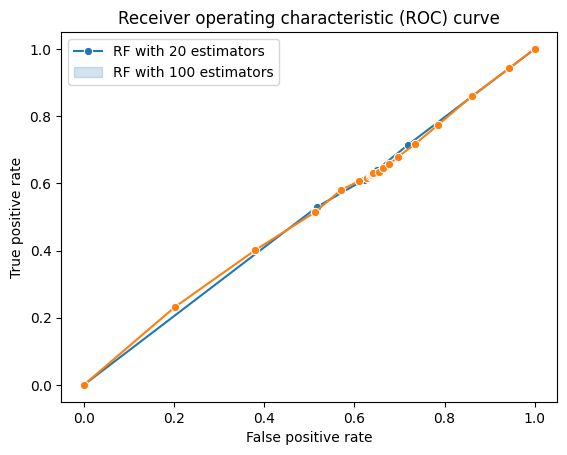

In [48]:
# Use roc_curve to record fpr and tpr for rf_20_model
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test, rf_20_predictions)
# Use roc_curve to record fpr and tpr for rf_100_model
fpr_100, tpr_100, thresholds_100 = roc_curve(y_test, rf_100_predictions)


fig = plt.figure()
ax = fig.add_subplot(111)


sns.lineplot(x=fpr_20, y=tpr_20, marker = 'o')
sns.lineplot(x=fpr_100, y=tpr_100, marker = 'o')

plt.title("Receiver operating characteristic (ROC) curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend(['RF with 20 estimators', 'RF with 100 estimators'])
plt.show()


In [49]:
# AUC for rf_20_model
auc_20 = auc(fpr_20, tpr_20)
print("AUC of the RF model with 20 estimators is {:.3f}".format(auc_20))

# AUC for rf_100_model
auc_100 = auc(fpr_100, tpr_100)
print("AUC of the RF model with 100 estimators is {:.3f}".format(auc_100))


AUC of the RF model with 20 estimators is 0.502
AUC of the RF model with 100 estimators is 0.506
